In [1]:
import networkx as nx
import random
import numpy as np
from matplotlib import pyplot as plt

In [2]:
N = 100
k = 8
p = 0.01
q = .25

In [134]:
def get_nbh(i, lwd):
    nbh1 = (i//lwd) * lwd + (i % lwd + 1) % lwd
    nbh2 = (lwd + i//lwd - 1) % lwd * lwd + i % lwd
    nbh3 = (lwd + i//lwd - 1) % lwd * lwd + (i % lwd + 1) % lwd
    nbh4 = (lwd + i//lwd - 1) % lwd * lwd + (i % lwd + lwd - 1) % lwd
    return np.asarray([nbh1, nbh2, nbh3, nbh4])

In [135]:
def get_filter_nbh(i, nbhs, lwd):
    nbhs1 = nbhs[(nbhs//lwd < i//lwd) & (nbhs%lwd >= ((i-1)%lwd))]
    nbhs2 = nbhs[(nbhs//lwd == i//lwd) & (nbhs%lwd > (i%lwd))]
    return np.append(nbhs1, nbhs2)

In [143]:
def make_graph(N, beta):
    g1 = nx.Graph()
    lwd = int(np.floor(np.sqrt(N)))
    for i in range(N):
        g1.add_node(i)
    for i in range(N):
        nbhs = get_nbh(i, lwd)
        for nbh in nbhs:
            g1.add_edge(i, nbh)
    for i in range(N):
        all_nbhs = np.asarray(list(g1.neighbors(i)))
        nbhs = np.asarray(list(set(get_nbh(i, lwd)).intersection(set(all_nbhs))))
        if len(nbhs) > 0:
            check = np.random.random(len(nbhs))
            nbhs_not = nbhs[check <= beta]
            for j in range(len(nbhs_not)):
                g1.remove_edge(i, nbhs_not[j])
                new_par = np.random.choice(list(set(range(N)) - set([i, *all_nbhs])))
                g1.add_edge(i, new_par)
                all_nbhs = np.asarray(list(g1.neighbors(i)))
    return g1

In [163]:
def get_all_weights(g1):
    return sum(nx.get_node_attributes(g1, 'weight').values())

In [164]:
def get_nbh_weights(g1, n):
    return sum(nx.get_node_attributes(g1.subgraph(g1.neighbors(n)), 'weight').values())

In [165]:
def sim(g1, N, p, q):
    ws = [get_all_weights(g1)]
    while (ws[-1] != N) and (len(ws) < 10**2):
        poses = np.floor(N * np.random.random(N))
        for i in poses:
            if (g1.nodes[i]['weight'] == 0):
                k = len(list(g1.neighbors(i)))
                if k > 0:
                    frac = get_nbh_weights(g1, i) / k
                    if random.random() <= (p + q * frac):
                        g1.nodes[i]['weight'] = 1
        ws.append(get_all_weights(g1))
    return np.asarray(ws)/N

In [166]:
def sim_zero(N, p, q, beta):
    g1 = make_graph(N=N, beta=beta)
    for i in g1.nodes:
        g1.nodes[i]['weight'] = 0
    return sim(g1 = g1, N = N, p = p, q = q)

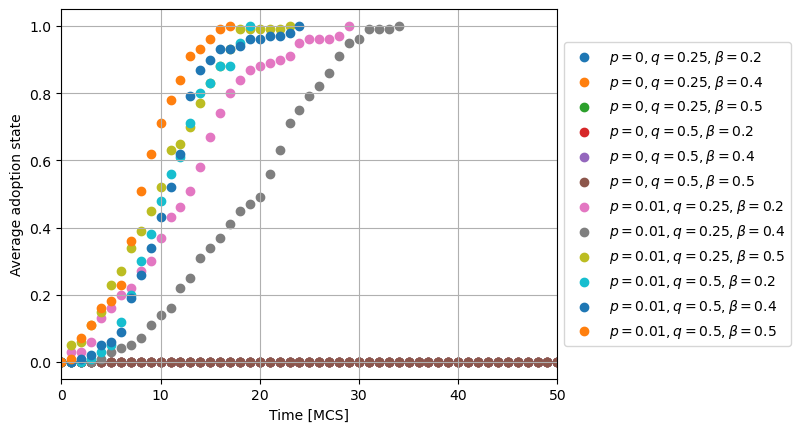

In [167]:
for p in [0, .01]:
    for q in [.25, .5]:
        for beta in [.2, .4, .5]:
            temp = sim_zero(N=N, p=p, q=q, beta=beta)
            plt.scatter(np.arange(len(temp)), temp, label=f'$p={p}, q={q}, \\beta = {beta}$')
plt.xlim([0,50])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Time [MCS]')
plt.ylabel('Average adoption state')
plt.grid()
plt.show()

In [168]:
def sim_random_eight(N, p, q, beta):
    g1 = make_graph(N=N, beta=beta)
    for i in g1.nodes:
        g1.nodes[i]['weight'] = 0
    poses = np.floor(N * np.random.random(8))
    for i in poses:
        g1.nodes[i]['weight'] = 1
    return sim(g1 = g1, N = N, p = p, q = q)

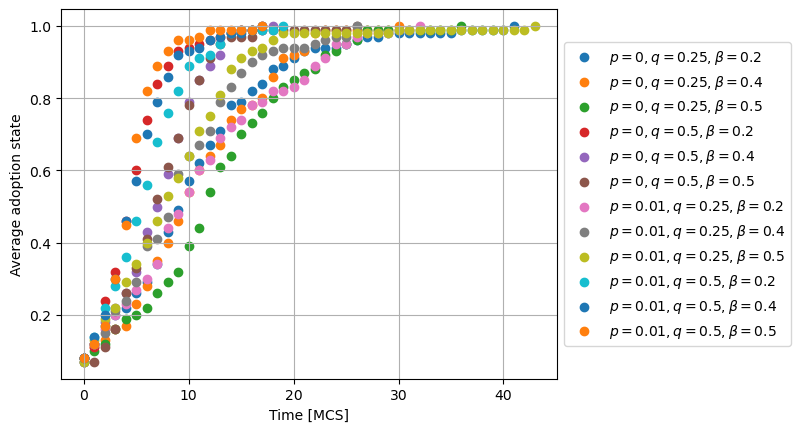

In [170]:
for p in [0, .01]:
    for q in [.25, .5]:
        for beta in [.2, .4, .5]:
            temp = sim_random_eight(N=N, p=p, q=q, beta=beta)
            plt.scatter(np.arange(len(temp)), temp, label=f'$p={p}, q={q}, \\beta = {beta}$')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Time [MCS]')
plt.ylabel('Average adoption state')
plt.grid()
plt.show()

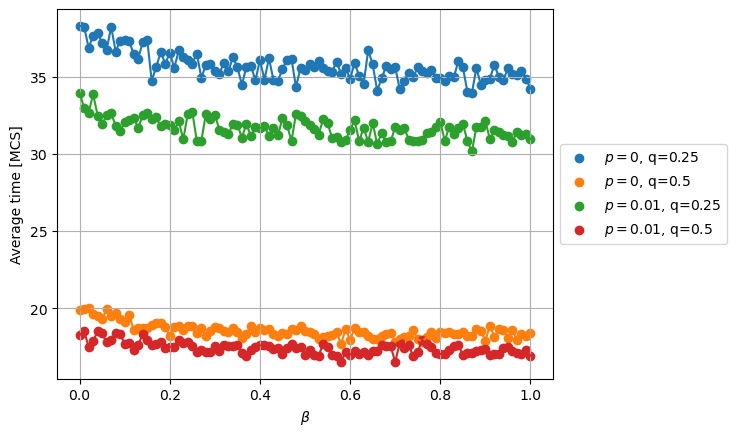

In [171]:
M = 100
for p in [0, .01]:
    for q in [.25, .5]:
        temp = []
        betas = np.round(np.arange(0, 1.01, .01),2)
        for beta in betas:
            temp.append(np.asarray([len(sim_random_eight(N=N, p=p, q=q, beta=beta)) for i in range(M)]).mean())
        plt.scatter(betas, temp, label=f'$p={p}$, q={q}')
        plt.plot(betas, temp)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('$\\beta$')
plt.ylabel('Average time [MCS]')
plt.grid()
plt.show()

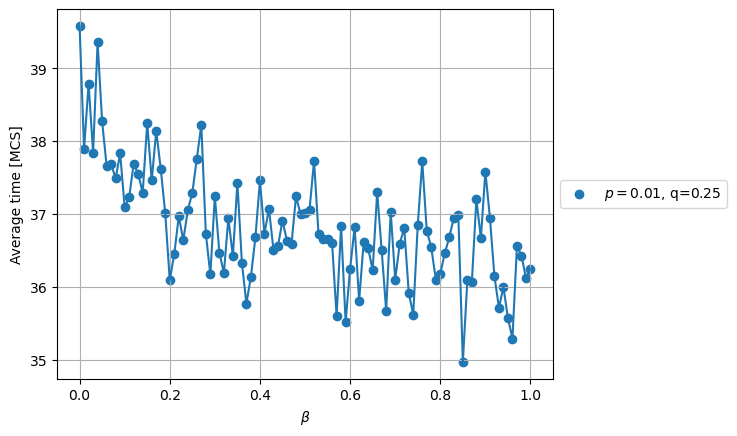

In [158]:
M = 100
for p in [.01]:
    for q in [.25]:
        temp = []
        betas = np.round(np.arange(0, 1.01, .01),2)
        for beta in betas:
            temp.append(np.asarray([len(sim_zero(N=100, p=p, q=q, beta=beta)) for i in range(M)]).mean())
        plt.scatter(betas, temp, label=f'$p={p}$, q={q}')
        plt.plot(betas, temp)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('$\\beta$')
plt.ylabel('Average time [MCS]')
plt.grid()
plt.show()

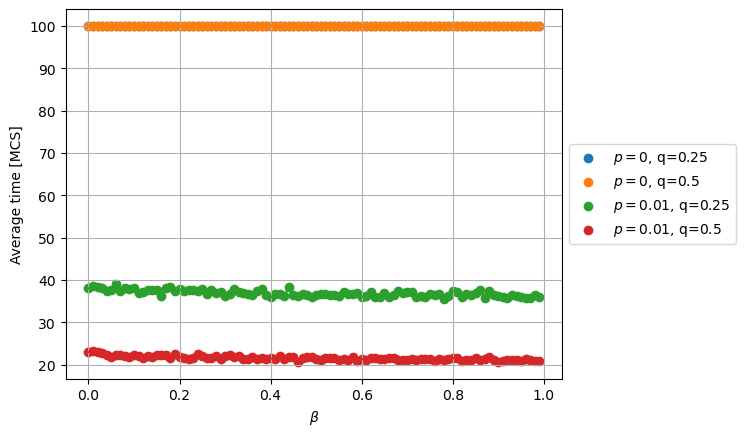

In [172]:
M = 100
for p in [0, .01]:
    for q in [.25, .5]:
        temp = []
        betas = np.round(np.arange(0, 1, .01),2)
        for beta in betas:
            temp.append(np.asarray([len(sim_zero(N=N, p=p, q=q, beta=beta)) for i in range(M)]).mean())
        plt.scatter(betas, temp, label=f'$p={p}$, q={q}')
        plt.plot(betas, temp)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('$\\beta$')
plt.ylabel('Average time [MCS]')
plt.grid()
plt.show()

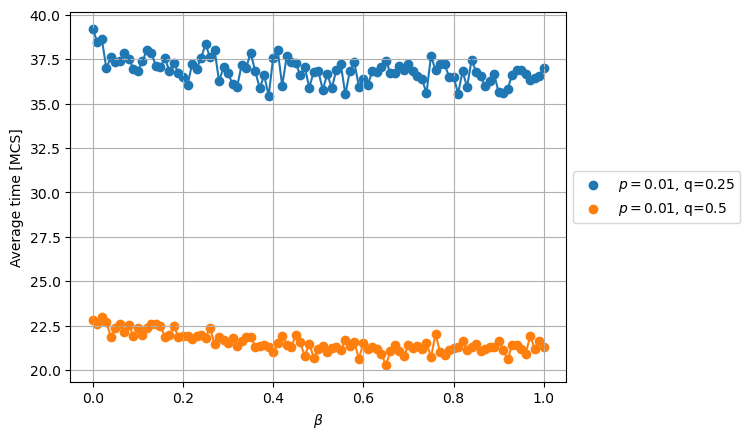

In [174]:
M = 100
for p in [.01]:
    for q in [.25, .5]:
        temp = []
        betas = np.round(np.arange(0, 1.01, .01),2)
        for beta in betas:
            temp.append(np.asarray([len(sim_zero(N=N, p=p, q=q, beta=beta)) for i in range(M)]).mean())
        plt.scatter(betas, temp, label=f'$p={p}$, q={q}')
        plt.plot(betas, temp)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('$\\beta$')
plt.ylabel('Average time [MCS]')
plt.grid()
plt.show()

In [159]:
def func1(x, p, q):
    return (1 - x) * (p + q * x)

In [160]:
def euler(x0, func, ts, p, q):
    xs = np.zeros(len(ts))
    xs[0] = x0    
    for i in range(1, len(ts)):
        xs[i] = xs[i-1] + func(xs[i-1], p, q) * (ts[i] - ts[i-1])
    return xs

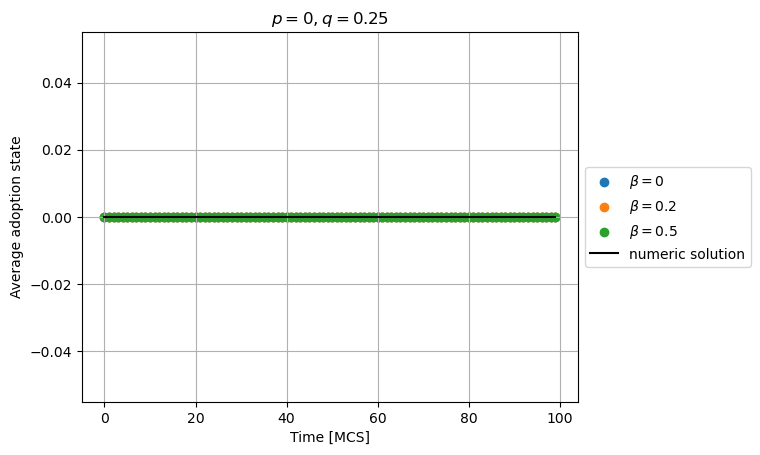

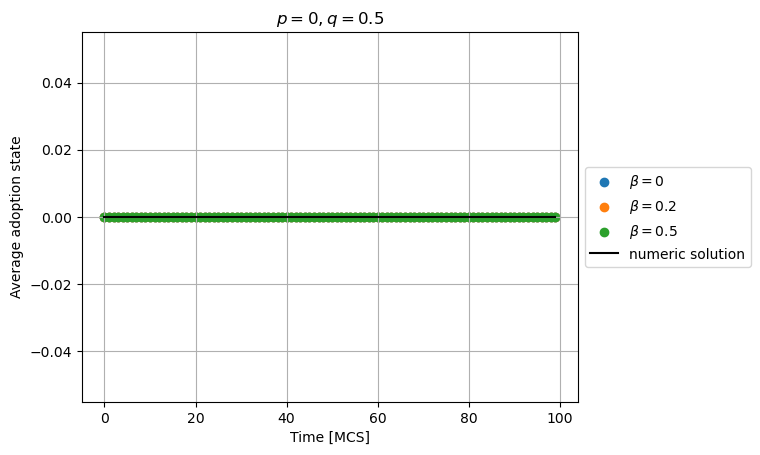

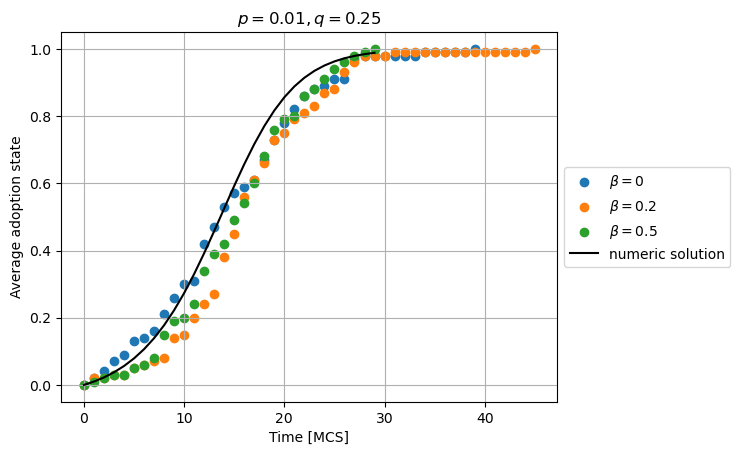

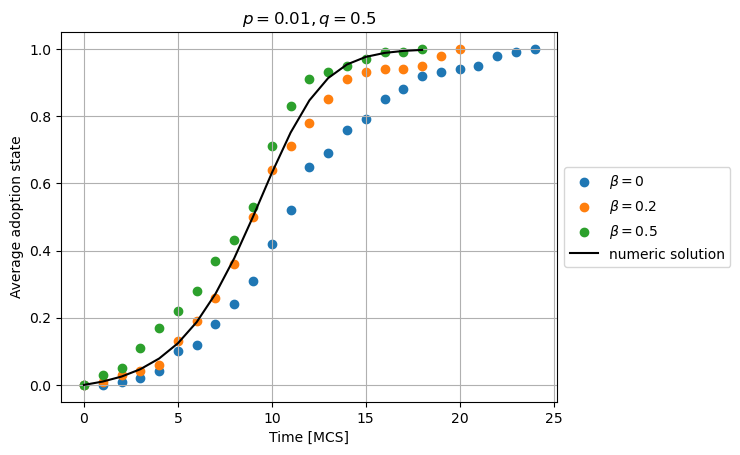

In [161]:
for p in [0, .01]:
    for q in [.25, .5]:
        for beta in [0, .2, .5]:
            temp = sim_zero(N=N, p=p, q=q, beta=beta)
            ts = np.arange(len(temp))
            plt.scatter(ts, temp, label=f'$\\beta = {beta}$')
        t_temp = euler(0, func1, ts, p, q)
        plt.plot(ts, t_temp, color='black', label='numeric solution')
        plt.title(f'$p={p}, q={q}$')
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.xlabel('Time [MCS]')
        plt.ylabel('Average adoption state')
        plt.grid()
        plt.show()

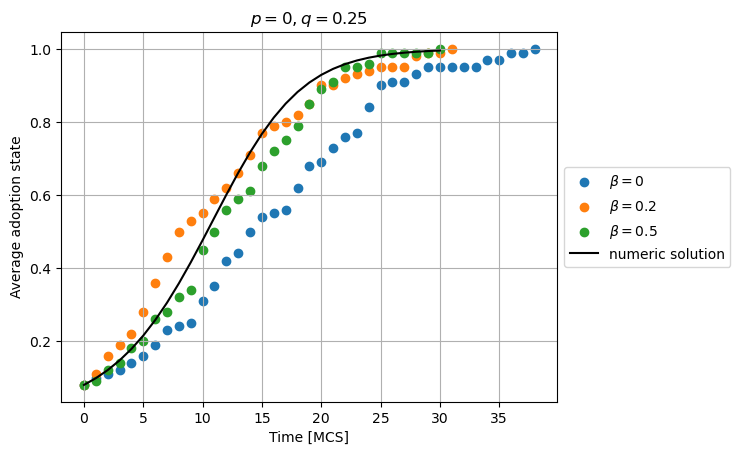

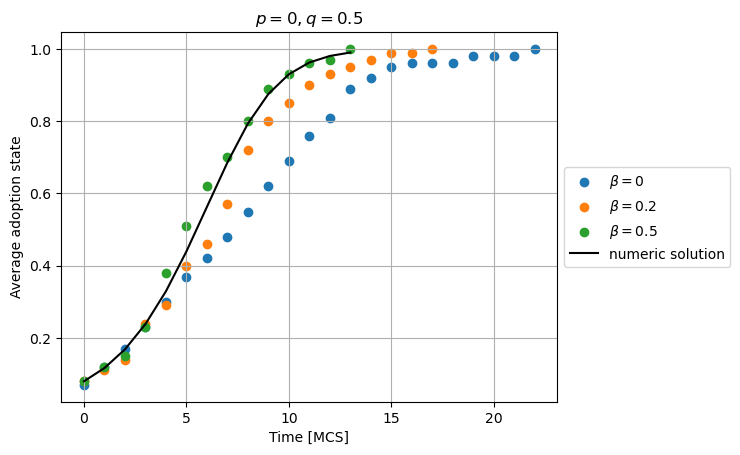

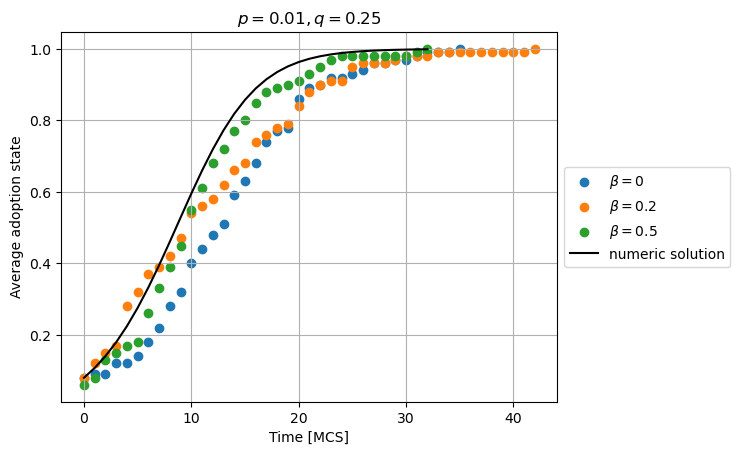

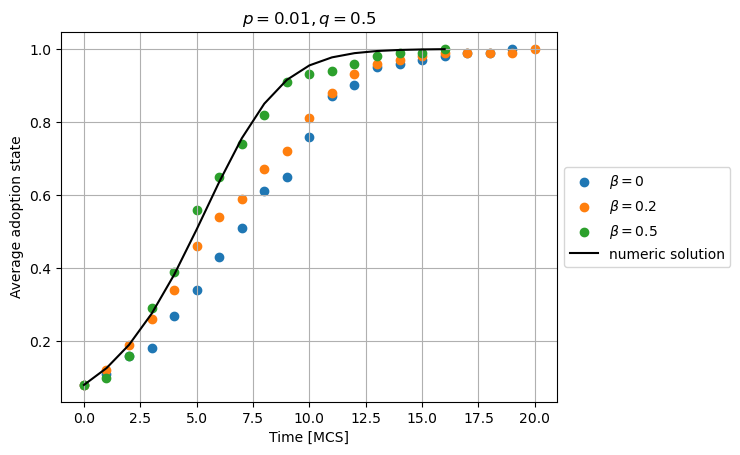

In [162]:
for p in [0, .01]:
    for q in [.25, .5]:
        for beta in [0, .2, .5]:
            temp = sim_random_eight(N=N, p=p, q=q, beta=beta)
            ts = np.arange(len(temp))
            plt.scatter(ts, temp, label=f'$\\beta = {beta}$')
        t_temp = euler(8/N, func1, ts, p, q)
        plt.plot(ts, t_temp, color='black', label='numeric solution')
        plt.title(f'$p={p}, q={q}$')
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.xlabel('Time [MCS]')
        plt.ylabel('Average adoption state')
        plt.grid()
        plt.show()